# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [39]:
library(tidyverse)
library(Rtsne)

## Question 1  

#### a) Import your data.  
#### b) Check out the columns present using one of R's data frame summary.  
#### c) Get summary statistics on the numeric variables.  

In [3]:
wine <- read.csv("/content/wine.csv")
glimpse(wine)
summary(wine)

Rows: 178
Columns: 14
$ Alcohol                       <dbl> 14.23, 13.20, 13.16, 14.37, 13.24, 14.20…
$ Malicacid                     <dbl> 1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.87…
$ Ash                           <dbl> 2.43, 2.14, 2.67, 2.50, 2.87, 2.45, 2.45…
$ Alcalinity_of_ash             <dbl> 15.6, 11.2, 18.6, 16.8, 21.0, 15.2, 14.6…
$ Magnesium                     <int> 127, 100, 101, 113, 118, 112, 96, 121, 9…
$ Total_phenols                 <dbl> 2.80, 2.65, 2.80, 3.85, 2.80, 3.27, 2.50…
$ Flavanoids                    <dbl> 3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.52…
$ Nonflavanoid_phenols          <dbl> 0.28, 0.26, 0.30, 0.24, 0.39, 0.34, 0.30…
$ Proanthocyanins               <dbl> 2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.98…
$ Color_intensity               <dbl> 5.64, 4.38, 5.68, 7.80, 4.32, 6.75, 5.25…
$ Hue                           <dbl> 1.04, 1.05, 1.03, 0.86, 1.04, 1.05, 1.02…
$ X0D280_0D315_of_diluted_wines <dbl> 3.92, 3.40, 3.17, 3.45, 2.93, 2.85, 3.58…
$ Proline         

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?

Scaling and centering would be helpful because the variables all run on different scales. For example, Proline has a wide range while malic acid has a smaller range. PCA will be sensitive to scale and weight some variables unfairly high without scaling and centering.

In [26]:
centered_wine <- wine |>
  mutate(across(-class, ~as.numeric(scale(.)))) |>
  select(-class)
summary(centered_wine)

    Alcohol           Malicacid            Ash           Alcalinity_of_ash  
 Min.   :-2.42739   Min.   :-1.4290   Min.   :-3.66881   Min.   :-2.663505  
 1st Qu.:-0.78603   1st Qu.:-0.6569   1st Qu.:-0.57051   1st Qu.:-0.687199  
 Median : 0.06083   Median :-0.4219   Median :-0.02375   Median : 0.001514  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.000000  
 3rd Qu.: 0.83378   3rd Qu.: 0.6679   3rd Qu.: 0.69614   3rd Qu.: 0.600395  
 Max.   : 2.25341   Max.   : 3.1004   Max.   : 3.14745   Max.   : 3.145637  
   Magnesium       Total_phenols        Flavanoids      Nonflavanoid_phenols
 Min.   :-2.0824   Min.   :-2.10132   Min.   :-1.6912   Min.   :-1.8630     
 1st Qu.:-0.8221   1st Qu.:-0.88298   1st Qu.:-0.8252   1st Qu.:-0.7381     
 Median :-0.1219   Median : 0.09569   Median : 0.1059   Median :-0.1756     
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000     
 3rd Qu.: 0.5082   3rd Qu.: 0.80672   3rd Qu.: 0.8467   3rd Qu.: 0.6078     

## Question 3

#### a) Perform PCA

X

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

38.21% for PC1 and 18.36% for PC2. We use the summary function to see that information.

#### c) Why are we doing PCA first?

PCA allows us to get an idea of how the data looks with dimensionality reduction. We can use the PCA to learn new things about the data when put in a simpler form.

#### d) What is the rotation matrix? Print it explicitly.  

X

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  

X

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

I see that the overall curve resembles an arch, and seems to lack much dimensiality. However, when taking the classes into account, we find a much clearer separation of variables. We have three distinct centers for each class.

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
PCA might fail where our data is of the form of a circle, or some other nonlinear pattern for all variables. Suppose that we have data spread in a circle of radius 1. Then any attempt of reducing dimensionality will not do anything, as both axes have the same distribution - reducing dimensionality either keeps everything the same or makes it more difficult to understand.

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.

A vector space is a linear space made up of the linear combinations of vectors, while a manifold is a set which locally resembles a vector space. So, all manifolds are vector spaces, though not all vector spaces are manifolds.

The difference between T-SNE and PCA is that PCA reduces dimensionality and provides a rotation matrix to transform data, while T-SNE reduces dimensionality through the use of probability spaces. PCA uses a clear vector space, while T-SNE creates lower dimension manifolds for training data, which may not have a linear relation to the initial data.

In [17]:
wine_pca <- prcomp(centered_wine);
summary(wine_pca);

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.169 1.5802 1.2025 0.95863 0.92370 0.80103 0.74231
Proportion of Variance 0.362 0.1921 0.1112 0.07069 0.06563 0.04936 0.04239
Cumulative Proportion  0.362 0.5541 0.6653 0.73599 0.80162 0.85098 0.89337
                           PC8     PC9   PC10    PC11    PC12    PC13
Standard deviation     0.59034 0.53748 0.5009 0.47517 0.41082 0.32152
Proportion of Variance 0.02681 0.02222 0.0193 0.01737 0.01298 0.00795
Cumulative Proportion  0.92018 0.94240 0.9617 0.97907 0.99205 1.00000

In [18]:
print(wine_pca$rotation)

                                       PC1          PC2         PC3         PC4
Alcohol                       -0.144329395 -0.483651548 -0.20738262 -0.01785630
Malicacid                      0.245187580 -0.224930935  0.08901289  0.53689028
Ash                            0.002051061 -0.316068814  0.62622390 -0.21417556
Alcalinity_of_ash              0.239320405  0.010590502  0.61208035  0.06085941
Magnesium                     -0.141992042 -0.299634003  0.13075693 -0.35179658
Total_phenols                 -0.394660845 -0.065039512  0.14617896  0.19806835
Flavanoids                    -0.422934297  0.003359812  0.15068190  0.15229479
Nonflavanoid_phenols           0.298533103 -0.028779488  0.17036816 -0.20330102
Proanthocyanins               -0.313429488 -0.039301722  0.14945431  0.39905653
Color_intensity                0.088616705 -0.529995672 -0.13730621  0.06592568
Hue                           -0.296714564  0.279235148  0.08522192 -0.42777141
X0D280_0D315_of_diluted_wines -0.3761674

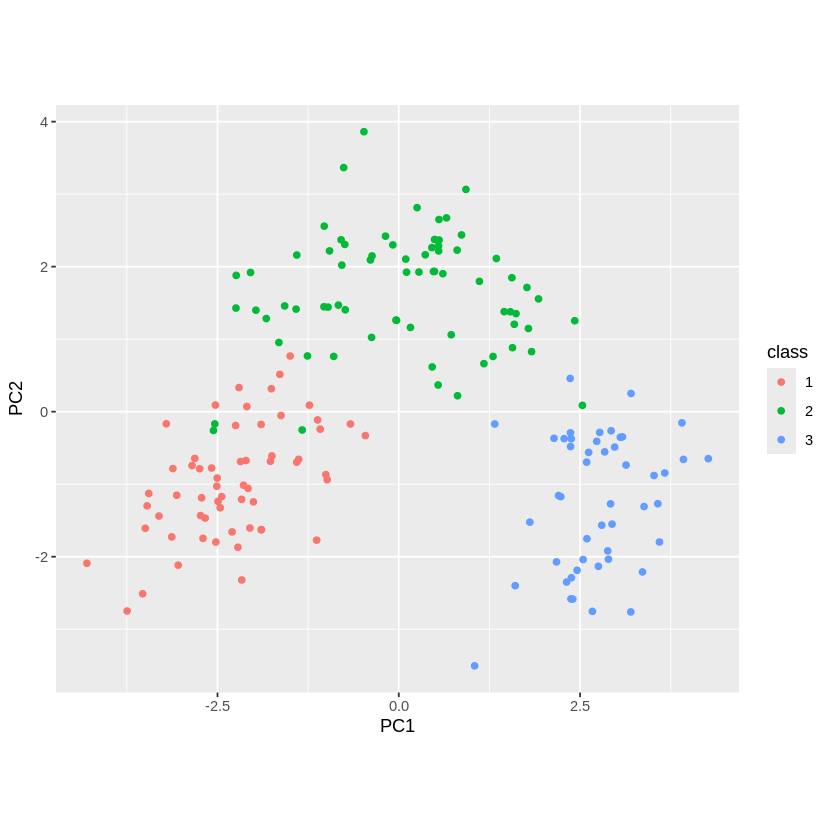

In [47]:
pcas <- as_tibble(wine_pca$x[, 1:2])

pcas <- pcas |>
  mutate(class = as.factor(wine$class))

colnames(pcas) <- c("PC1", "PC2", "class")

print(ggplot(pcas, aes(PC1, PC2, color = class)) + geom_point() + coord_fixed())

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

X

#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

X

#### c) Why didn't we stop at PCA?

While PCA could separate our variables, there was still work to have them better separated. T-SNE allows us to see local relationships more clearly to show new structures of the data we did not otherwise see.

#### d) What other types of data does this workflow make sense for?

This workflow makes sense for any sort of data split that is split into groups or factors in some way. We were able to separate with PCA and further clarify visually the differences with T-SNE.


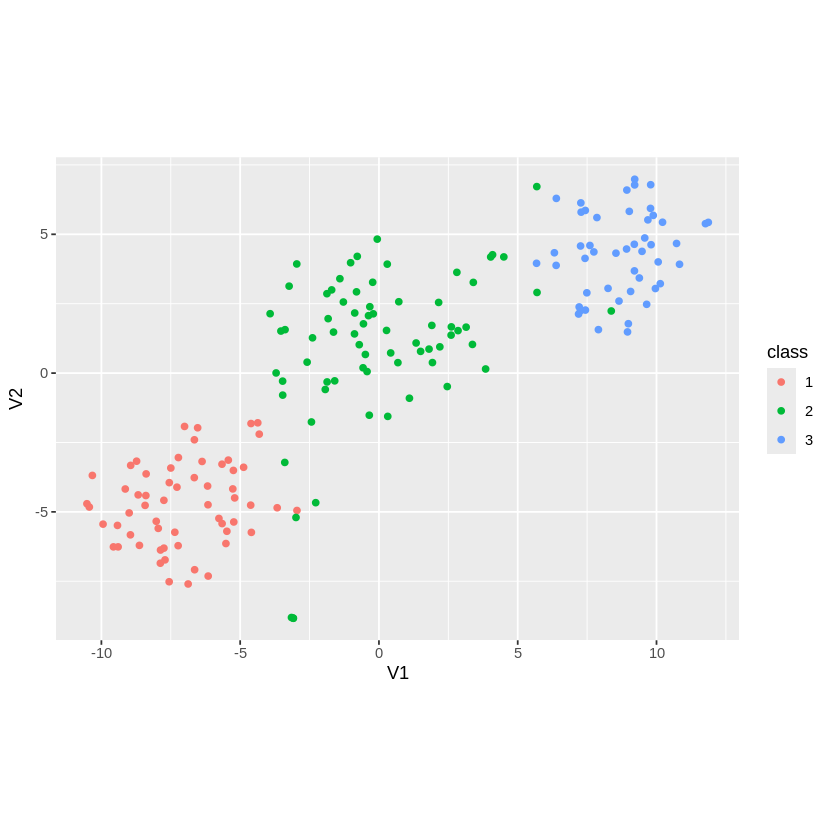

In [48]:
set.seed(123)

pcas_subset <- as_tibble(wine_pca$x[, 1:10])

tsne_out <- Rtsne(pcas_subset, dims = 2, perplexity = 30, verbose = FALSE, check_duplicates = FALSE)

results <- as_tibble(tsne_out$Y) |>
  mutate(class = as.factor(wine$class))

print(ggplot(results, aes(V1, V2, color = class)) + geom_point() + coord_fixed())